Original sample mean: 7.07
Bootstrapped 95% CI: [6.80, 7.34]


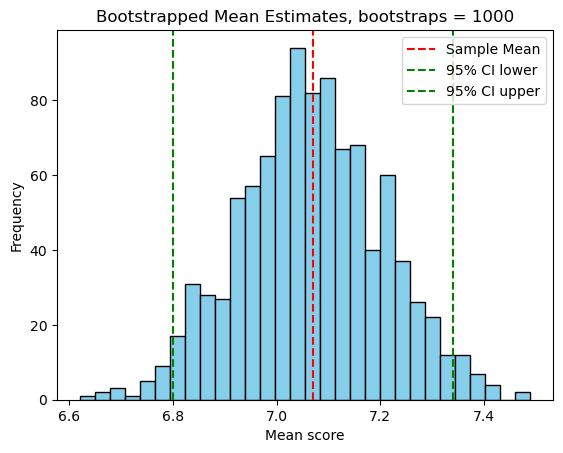

In [2]:
import numpy as np
import matplotlib.pyplot as plt
'''
Playing around with different numbers of bootstrapping samples
'''


# Step 1: sample data of length n 
n = 100
scores = np.array([np.random.randint(5,10) for _ in range(n)])

# Step 2: number of bootstrap samples
n_bootstraps = 1000
boot_means = []

# Step 3: bootstrap loop
for i in range(n_bootstraps):
    # sample with replacement
    sample = np.random.choice(scores, size=len(scores), replace=True)
    # compute mean of this sample
    boot_means.append(np.mean(sample))

# Step 4: calculate confidence interval (e.g. 95%)
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"Original sample mean: {np.mean(scores):.2f}")
print(f"Bootstrapped 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Step 5: visualise distribution of bootstrap means
plt.hist(boot_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(scores), color='red', linestyle='--', label='Sample Mean')
plt.axvline(ci_lower, color='green', linestyle='--', label='95% CI lower')
plt.axvline(ci_upper, color='green', linestyle='--', label='95% CI upper')
plt.title(f"Bootstrapped Mean Estimates, bootstraps = {n_bootstraps}")
plt.xlabel("Mean score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Original sample mean: 7.10
Bootstrapped 95% CI: [6.84, 7.40]


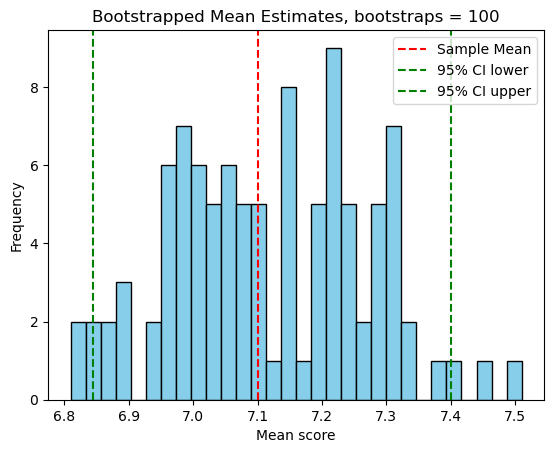

In [14]:
#repeat for smaller n to observe effect on confidence intervals:

# Step 1: sample data of length n 
n = 100
scores = np.array([np.random.randint(5,10) for _ in range(n)])

# Step 2: number of bootstrap samples
n_bootstraps = 100
boot_means = []

# Step 3: bootstrap loop
for i in range(n_bootstraps):
    # sample with replacement
    sample = np.random.choice(scores, size=len(scores), replace=True)
    # compute mean of this sample
    boot_means.append(np.mean(sample))

# Step 4: calculate confidence interval (e.g. 95%)
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"Original sample mean: {np.mean(scores):.2f}")
print(f"Bootstrapped 95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Step 5: visualise distribution of bootstrap means
plt.hist(boot_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(scores), color='red', linestyle='--', label='Sample Mean')
plt.axvline(ci_lower, color='green', linestyle='--', label='95% CI lower')
plt.axvline(ci_upper, color='green', linestyle='--', label='95% CI upper')
plt.title(f"Bootstrapped Mean Estimates, bootstraps = {n_bootstraps}")
plt.xlabel("Mean score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Original data: [ 7  4  8  5  7 10  3  7  8  5]


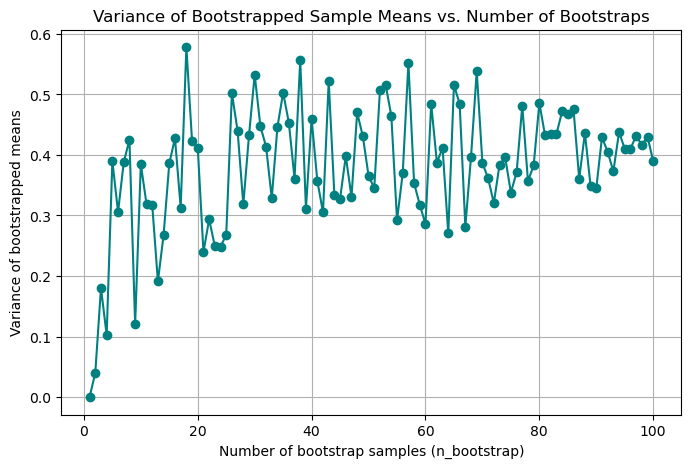

In [ ]:
'''
Variance converges as number of bootstrapped samples increases
 --> law of large numbers
'''
# Step 1: create array of 10 random integers between 1 and 10
np.random.seed(42)  # for reproducibility
data = np.random.randint(1, 11, size=10)
print("Original data:", data)

# Step 2: define range of bootstrap sample sizes
n_values = range(10, 101)
variances = []

# Step 3: for each n_bootstrap, compute variance of bootstrapped sample means
for n_bootstrap in n_values:
    boot_means = []
    for _ in range(n_bootstrap):
        # sample with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        # compute mean of this sample
        boot_means.append(np.mean(sample))
    # calculate variance of the bootstrapped means
    var = np.var(boot_means)
    variances.append(var)

# Step 4: plot variance against number of bootstrap samples
plt.figure(figsize=(8, 5))
plt.plot(n_values, variances, marker='o', color='teal')
plt.title("Variance of Bootstrapped Sample Means vs. Number of Bootstraps")
plt.xlabel("Number of bootstrap samples (n_bootstrap)")
plt.ylabel("Variance of bootstrapped means")
plt.grid(True)
plt.show()

Bootstrapped Mean: 40.13
95% Confidence Interval: [38.65, 41.75]


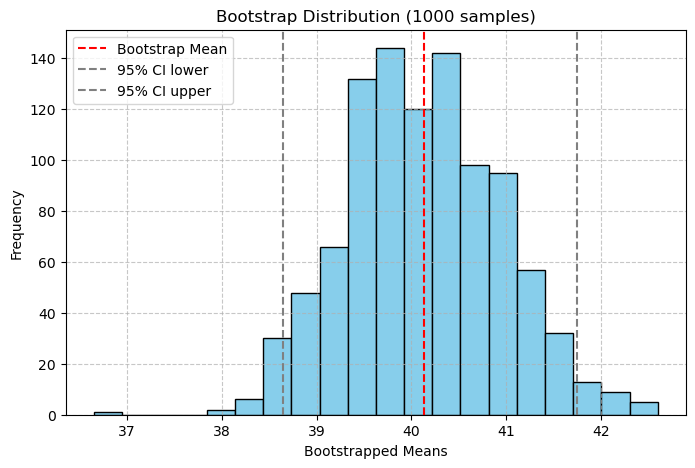

In [76]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([34, 36, 45, 40, 38, 42, 41, 39, 37, 43, 46, 44, 35, 40, 39, 38, 47, 42, 41, 36])

n_bootstrap = 1000
means = []

for _ in range(n_bootstrap):
    sample_idx = np.random.randint(len(data), size=len(data))  # sample with replacement
    bootstrap_sample = data[sample_idx]
    means.append(np.mean(bootstrap_sample))

average_mean = np.mean(means)
lower, upper = np.percentile(means, [2.5, 97.5])

print(f"Bootstrapped Mean: {average_mean:.2f}")
print(f"95% Confidence Interval: [{lower:.2f}, {upper:.2f}]")

plt.figure(figsize=(8, 5))
plt.hist(means, bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_mean, color='red', linestyle='--', label='Bootstrap Mean')
plt.axvline(lower, color='grey', linestyle='--', label='95% CI lower')
plt.axvline(upper, color='grey', linestyle='--', label='95% CI upper')
plt.xlabel('Bootstrapped Means')
plt.ylabel('Frequency')
plt.title(f'Bootstrap Distribution ({n_bootstrap} samples)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

